# **Segundo Trabalho Computacional**
TIP7077 – Inteligência Computacional Aplicada 


Mariana Marques Ferreira - 587140

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from normalization import normalize_zscore
from read_image import get_image_data, pcacov
from classifier import (linear_classifier, perceptron_logistic_classifier, 
                        mlp_sigmoid_classifier, mlp_tanh_classifier_2h)

# **Atividade 1**

In [2]:
number_individuos = 15
x_values, y_values = get_image_data(number_individuos=number_individuos, dimension=(30, 30))
print("x_values", x_values.shape, "y_values", y_values.shape)

x_values (900, 165) y_values (165, 15)


# **Atividade 2**

## **Classificador Linear de Mínimos Quadrados (MQ)**

In [3]:
weight_mq_atv2 = linear_classifier(x_values=x_values.T, y_values=y_values, 
    training_data_rate=0.8, number_simulations=50, verbose=True)

================ RESULTADOS - MQ ================
Média:  97.33% | Mediana:  96.97%
Mínimo:  90.91% | Máximo: 100.00%
Desvio Padrão:   2.40
Tempo: 3.34 s


## **Perceptron Logístico (PL)**

In [4]:
normz_x_values = normalize_zscore(x_values)
weight_pl_atv2 = perceptron_logistic_classifier(x_values=normz_x_values.T, 
    y_values=y_values, number_neurons=number_individuos, training_data_rate=0.8, 
    number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - PL ================
Média:  83.27% | Mediana:  81.82%
Mínimo:  66.67% | Máximo:  93.94%
Desvio Padrão:   6.28
Tempo: 6.51 s


## **Perceptron Multicamadas com uma camada (MLP-1H)**

In [5]:
weight1_mlp1h_atv2, weight2_mlp1h_atv2 = mlp_sigmoid_classifier(x_values=normz_x_values.T, 
    y_values=y_values, number_neurons=number_individuos, number_hidden_neurons=90, 
    training_data_rate=0.8, number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - MLP-1H(Sigmoid) ================
Média:  86.24% | Mediana:  84.85%
Mínimo:  75.76% | Máximo:  96.97%
Desvio Padrão:   5.26
Tempo: 22.95 s


## **Perceptron Multicamadas com duas camada (MLP-2H)**

In [6]:
weight1_mlp2h_atv2, weight2_mlp2h_atv2, weight3_mlp2h_atv2 = mlp_tanh_classifier_2h(
    x_values=x_values.T, y_values=y_values, number_neurons=number_individuos, 
    number_hidden_neurons=90, number_hidden_neurons2=30, training_data_rate=0.8, 
    number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - MLP-2H(Tanh) ================
Média:  69.88% | Mediana:  71.21%
Mínimo:  48.48% | Máximo:  84.85%
Desvio Padrão:   9.12
Tempo: 20.97 s


## **Comentário**


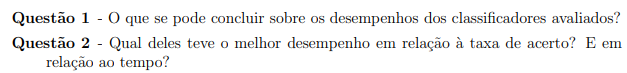

# **Atividade 3**

In [7]:
ve_cum, pca_x_values = pcacov(value=x_values, value_q=900)

threshold = 0.98
new_q = int((ve_cum <= threshold).sum())

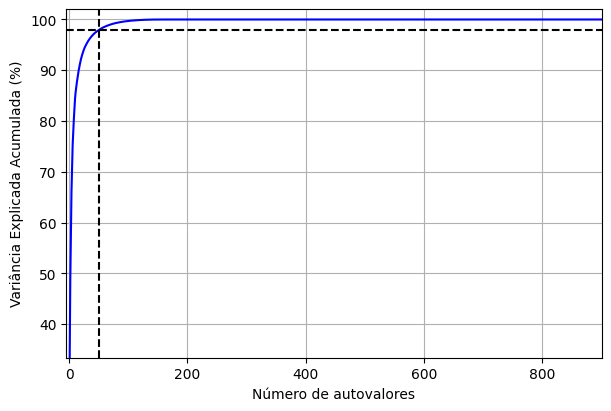

In [8]:
fig, graf = plt.subplots(figsize = (6, 4), constrained_layout=True)
graf.plot(np.linspace(1, len(ve_cum), 900), ve_cum*100, color="b")
graf.axhline(threshold*100, linestyle="--", color="k")
graf.axvline(new_q, linestyle="--", color="k")
graf.set(xlabel="Número de autovalores", ylabel="Variância Explicada Acumulada (%)")
graf.set(xlim=(-5, len(ve_cum)), ylim=(min(ve_cum)*100, 102))
graf.grid(True)
plt.show()

# **Atividade 4**

## **Classificador Linear de Mínimos Quadrados (MQ)**

In [9]:
weight_mq_atv4 = linear_classifier(x_values=pca_x_values.T, y_values=y_values, 
    training_data_rate=0.8, number_simulations=50, verbose=True)

================ RESULTADOS - MQ ================
Média:  96.18% | Mediana:  96.97%
Mínimo:  87.88% | Máximo: 100.00%
Desvio Padrão:   3.31
Tempo: 2.61 s


## **Perceptron Logístico (PL)**

In [10]:
pca_normz_x_values = normalize_zscore(pca_x_values)
weight_pl_atv4 = perceptron_logistic_classifier(x_values=pca_normz_x_values.T, 
    y_values=y_values, number_neurons=number_individuos, training_data_rate=0.8, 
    number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - PL ================
Média:   8.30% | Mediana:   9.09%
Mínimo:   0.00% | Máximo:  21.21%
Desvio Padrão:   4.57
Tempo: 3.42 s


## **Perceptron Multicamadas com uma camada (MLP-1H)**

In [11]:
weight1_mlp1h_atv4, weight2_mlp1h_atv4 = mlp_sigmoid_classifier(x_values=pca_normz_x_values.T, 
    y_values=y_values, number_neurons=number_individuos, number_hidden_neurons=90, 
    training_data_rate=0.8, number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - MLP-1H(Sigmoid) ================
Média:   5.33% | Mediana:   6.06%
Mínimo:   0.00% | Máximo:  12.12%
Desvio Padrão:   3.56
Tempo: 18.42 s


## **Perceptron Multicamadas com duas camadas (MLP-2H)**

In [12]:
weight1_mlp2h_atv4, weight2_mlp2h_atv4, weight3_mlp2h_atv4 = mlp_tanh_classifier_2h(
    x_values=pca_x_values.T, y_values=y_values, number_neurons=number_individuos, 
    number_hidden_neurons=90, number_hidden_neurons2=30, training_data_rate=0.8, 
    number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - MLP-2H(Tanh) ================
Média:  70.36% | Mediana:  72.73%
Mínimo:  42.42% | Máximo:  87.88%
Desvio Padrão:   9.93
Tempo: 19.49 s


## **Comentário**

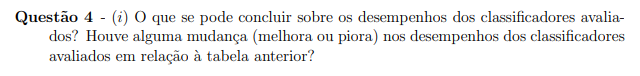

# **Atividade 5**

In [13]:
new_q = int((ve_cum <= 0.98).sum())
new_q

51

# **Atividade 6**

In [14]:
_, pcaq_x_values = pcacov(value=x_values, value_q=new_q)

## **Classificador Linear de Mínimos Quadrados (MQ)**

In [15]:
weight_mq_atv6 = linear_classifier(x_values=pcaq_x_values.T, y_values=y_values, 
    training_data_rate=0.8, number_simulations=50, verbose=True)

================ RESULTADOS - MQ ================
Média:  95.88% | Mediana:  96.97%
Mínimo:  87.88% | Máximo: 100.00%
Desvio Padrão:   3.14
Tempo: 0.14 s


## **Perceptron Logístico (PL)**

In [16]:
pcaq_normz_x_values = normalize_zscore(pcaq_x_values)
weight_pl_atv6 = perceptron_logistic_classifier(x_values=pcaq_normz_x_values.T, 
    y_values=y_values, number_neurons=number_individuos, training_data_rate=0.8, 
    number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - PL ================
Média:  95.58% | Mediana:  96.97%
Mínimo:  87.88% | Máximo: 100.00%
Desvio Padrão:   3.22
Tempo: 1.60 s


## **Perceptron Multicamadas com uma camada (MLP-1H)**

In [17]:
weight1_mlp1h_atv6, weight2_mlp1h_atv6 = mlp_sigmoid_classifier(x_values=pcaq_normz_x_values.T, 
    y_values=y_values, number_neurons=number_individuos, number_hidden_neurons=90, 
    training_data_rate=0.8, number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - MLP-1H(Sigmoid) ================
Média:  72.12% | Mediana:  72.73%
Mínimo:  48.48% | Máximo:  90.91%
Desvio Padrão:   8.93
Tempo: 4.89 s


## **Perceptron Multicamadas com duas camadas (MLP-2H)**

In [18]:
weight1_mlp2h_atv6, weight2_mlp2h_atv6, weight3_mlp2h_atv6 = mlp_tanh_classifier_2h(
    x_values=pcaq_x_values.T, y_values=y_values, number_neurons=number_individuos, 
    number_hidden_neurons=90, number_hidden_neurons2=30, training_data_rate=0.8, 
    number_of_rounds=50, epoch_numbers=10, learning_rate=0.01, verbose=True)

================ RESULTADOS - MLP-2H(Tanh) ================
Média:  74.85% | Mediana:  75.76%
Mínimo:  54.55% | Máximo:  96.97%
Desvio Padrão:  10.25
Tempo: 8.43 s


# **Atividade 7**

## **Classificador Linear de Mínimos Quadrados (MQ)**

## **Perceptron Logístico (PL)**

## **Perceptron Multicamadas com uma camada (MLP-1H)**

## **Perceptron Multicamadas com duas camadas (MLP-2H)**

# **Atividade 8**